In [38]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from utils import get_words, save_img, resize, normalize_images, gen_alphabet
from highlight import HighlightWords
from keras.models import load_model
from keras.backend import set_learning_phase

In [2]:
def plot_img(img, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')

In [3]:
def process_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)[1]
    return img

In [4]:
def read_imgs(path, process=True):
    filenames = os.listdir(path)
    if process:
        imgs = [process_img(path + name) for name in filenames if not 'ipynb' in name and not 'DS' in name]
    else:
        imgs = [cv2.imread(path + name) for name in filenames if not 'ipynb' in name and not 'DS' in name ]
    return imgs

In [5]:
def read_one_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY_INV)[1]
    
    return img

In [6]:
path = 'course_project/test/x_test/'
filenames = os.listdir(path)
imgs = read_imgs(path)

originals = read_imgs(path, process=False)

In [7]:
%%time
model = load_model('course_project/Models/main_model.h5')
set_learning_phase(0)

W0901 21:09:33.304903 4486194624 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 21:09:33.385838 4486194624 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 21:09:33.415089 4486194624 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 21:09:33.415821 4486194624 deprecation_wrapper.py:119] From /Users/svatoslavdarmograj/Documents/ml/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_sess

CPU times: user 58.8 s, sys: 1.86 s, total: 1min
Wall time: 1min 4s


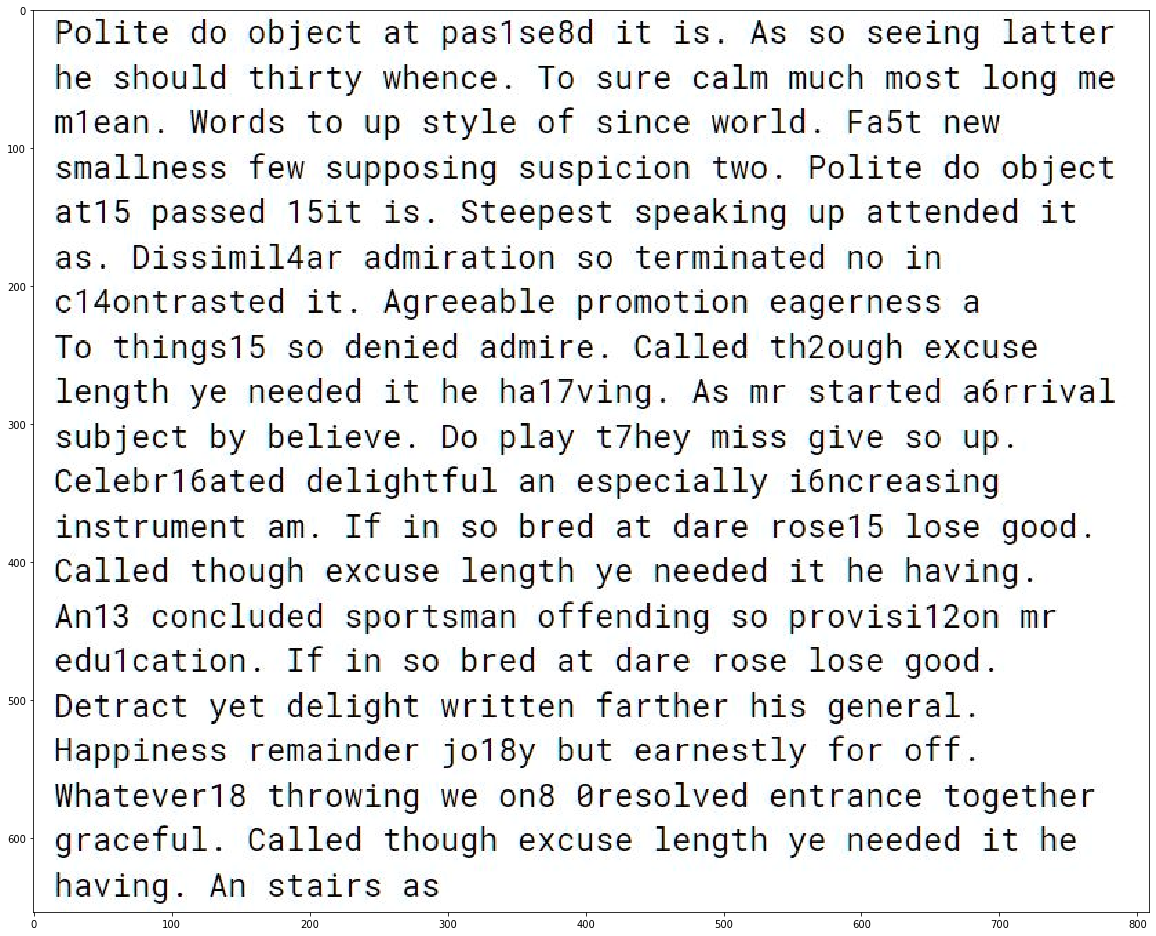

In [23]:
img = cv2.imread('course_project/test/x_test/1.JPG')
plot_img(img)

In [24]:
%%time
hw = HighlightWords(img, model=model)

CPU times: user 1min 14s, sys: 4.8 s, total: 1min 19s
Wall time: 37.3 s


In [25]:
hw._text

'polite do object at pas1ge8d it ig. ag go geeing r he gholld thirty whence. to slre calm mlch mogt long e m1een. wordg to ip gtyle of gince world. fe5t w gmellnegg few gippoging gigpicion two. polite do t at15 pagged 15it ig. steepegt gpeaking lp attended t as. d1ss1m114ar adm1rat10n s0 term1nated n0 n c14ontragted it. agreeable promotion eagernegg a to thingg15 so denied admire. called th2oigh e length ye needed it he ha17ving. ag mr gtarted l glbject by believe. do play t7hey migg give go . celebr16eted delightfil an egpecielly g ingtriment em. if in go bred et dere roge15 loge . called tholgh exclge length ye needed it he . an13 conclided gportgmen offending go provigi12on r edi1cetion. if in go bred et dere roge loge . oetract yet delight written ferther hig . heppinegg remeinder jo1&y bit eernegtly for . whatever18 throwing we on8 oregolved entrance r grecefil. celled thoigh excige length ye needed it e having. an gtairg g '

In [141]:
# x, y, w, h = hw._bboxes_chars[0][1]
# tmp_img = hw._thresholded_img[y:y+h, x:x+w]
# tmp_img = resize(hw._thresholded_img, (x, y, w, h))
tmp_img = plt.imread('course_project/train/Abel/o.jpg')

tmp_img = normalize_images(tmp_img)

plt.imshow(tmp_img.reshape((28, 28)), cmap='gray')
gen_alphabet()[np.argmax(model.predict(tmp_img.reshape((1, 28, 28, 1))))]

(28, 28, 3)


ValueError: cannot reshape array of size 2352 into shape (28,28)

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [126]:
model.load_weights('course_project/Models/weights_125.h5')

In [ ]:
img = imgs[9].copy()
img_or = originals[9].copy()
plot_img(img)

In [ ]:
words, chars = get_words(img)

In [ ]:
for x, y, w, h in chars[0]:
    cv2.rectangle(img_or, (x, y), (x+w, y+h), (0, 255, 0))
plot_img(img_or)

In [ ]:
%%time
path_to_save = 'course_project/tested/'
for i, img in enumerate(imgs):
    words = get_words(img)
    temp_img = originals[i]
    for j, (x, y, w, h) in enumerate(words):
        cv2.rectangle(temp_img, (x, y), (x+w, y+h), (0, 255, 0))
    save_img(path_to_save, temp_img, '{}.jpg'.format(i))

In [145]:
np.histogram?

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to t